In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # plotting
from sklearn import preprocessing

# Import dataset

In [2]:
dataset = pd.read_csv('building_fault_detection.csv')
# dataset.dataframeName = 'building_fault_detection.csv'
dataset.head()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Heating Set Point,AHU: Supply Air Temperature Cooling Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,Occupancy Mode Indicator,Fault Detection Ground Truth
0,11-09-2017 00:00,72.29,NaN,NaN,81.11,78.56,76.38,1,0.1,0.0,1.0,-0.04,0.0,0.23,0,1
1,11-09-2017 00:01,72.30,NaN,NaN,81.11,78.56,76.39,1,0.1,0.0,1.0,-0.04,0.0,0.23,0,1
2,11-09-2017 00:02,72.37,NaN,NaN,81.09,78.56,76.38,1,0.1,0.0,1.0,-0.04,0.0,0.22,0,1
3,11-09-2017 00:03,72.29,NaN,NaN,81.06,78.51,76.38,1,0.1,0.0,1.0,-0.04,0.0,0.22,0,1
4,11-09-2017 00:04,71.82,NaN,NaN,81.05,78.41,76.37,1,0.1,0.0,1.0,-0.04,0.0,0.24,0,1


In [111]:
dataset.dtypes

Datetime                                         datetime64[ns]
AHU: Supply Air Temperature                             float64
AHU: Supply Air Temperature Heating Set Point           float64
AHU: Supply Air Temperature Cooling Set Point           float64
AHU: Outdoor Air Temperature                            float64
AHU: Mixed Air Temperature                              float64
AHU: Return Air Temperature                             float64
AHU: Supply Air Fan Status                                int64
AHU: Supply Air Fan Speed Control Signal                float64
AHU: Outdoor Air Damper Control Signal                  float64
AHU: Return Air Damper Control Signal                   float64
AHU: Exhaust Air Damper Control Signal                  float64
AHU: Cooling Coil Valve Control Signal                  float64
AHU: Heating Coil Valve Control Signal                  float64
Occupancy Mode Indicator                                  int64
Fault Detection Ground Truth            

Convert time stamp to datetime format

In [4]:
# fix space padding in column names
columns = [c.strip() for c in dataset.columns]
dataset.columns = columns

# dataset.dtypes
dataset['Datetime']= pd.to_datetime(dataset['Datetime'], format='%d-%m-%Y %H:%M')
dataset['AHU: Outdoor Air Temperature'] = pd.to_numeric(dataset['AHU: Outdoor Air Temperature'], errors='coerce')
dataset.describe()

,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Heating Set Point,AHU: Supply Air Temperature Cooling Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Exhaust Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,Occupancy Mode Indicator,Fault Detection Ground Truth
count,15839,15839.000000,15249.000000,15249.000000,15838.000000,15839.000000,15839.000000,15839.0,15839.000000,15839.000000,15839.000000,15839.000000,15839.000000,15839.000000,15839.000000,15839.000000
mean,2017-09-18 14:09:49.586464,71.426713,61.809635,65.479393,63.966485,70.533240,75.126517,1.0,0.276561,0.540036,0.480253,0.471067,0.296770,0.069928,0.500032,0.636404
min,2017-09-11 00:00:00,49.550000,53.040000,55.040000,53.310000,58.990000,66.330000,1.0,0.100000,0.000000,0.000000,-0.040000,0.000000,0.000000,0.000000,0.000000
25%,2017-09-14 17:59:30,64.870000,53.040000,55.040000,59.670000,66.040000,71.960000,1.0,0.100000,0.000000,0.000000,-0.040000,0.000000,0.000000,0.000000,0.000000
50%,2017-09-19 11:59:00,71.970000,53.040000,72.500000,62.645000,71.270000,73.430000,1.0,0.240000,0.730000,0.280000,0.640000,0.000000,0.000000,1.000000,1.000000
75%,2017-09-22 05:58:30,77.330000,72.500000,72.500000,67.790000,74.800000,78.235000,1.0,0.500000,1.000000,1.000000,0.900000,0.450000,0.190000,1.000000,1.000000
max,2017-09-24 23:58:00,104.640000,72.500000,72.500000,87.520000,89.100000,90.280000,1.0,0.500000,1.000000,1.000000,0.900000,1.000000,1.000000,1.000000,1.000000
std,NaN,11.154960,9.612433,8.260370,6.163099,5.278614,4.773921,0.0,0.179154,0.465208,0.484652,0.434214,0.411018,0.108656,0.500016,0.481049


Find the missing records in dataset.

In [5]:
# check for missing records
td = dataset['Datetime'][dataset.shape[0]-1] - dataset['Datetime'][0] 
# td.total_minutes()

print("Unique dates in dataset ", dataset['Datetime'].apply(lambda x: str(x.date())).unique())
print("Missing dates in dataset 13, 16, 17")
print(f"Total minutes between start and end date {td.total_seconds()/60} \n total rows in dataset {dataset.shape[0]}")
print(f"Total remaining minutes excluding missing days {td.total_seconds()/60 - 24*3*60}")

Unique dates in dataset  ['2017-09-11' '2017-09-12' '2017-09-14' '2017-09-15' '2017-09-18'
 '2017-09-19' '2017-09-20' '2017-09-21' '2017-09-22' '2017-09-23'
 '2017-09-24']
Missing dates in dataset 13, 16, 17
Total minutes between start and end date 20158.0 
 total rows in dataset 15839
Total remaining minutes excluding missing days 15838.0


In [6]:
# check for fault free  days
dataset[dataset['Fault Detection Ground Truth']==0]['Datetime'].apply(lambda x: str(x.date())).unique()

array(['2017-09-20', '2017-09-21', '2017-09-23', '2017-09-24'],
      dtype=object)

## Helper functions

In [23]:
# Correlation matrix
def plotCorrelationMatrix(df:pd.DataFrame, graphWidth):
    filename = 'building_fault_detection.csv'#df.dataframeName
    df = df.dropna(axis='index') # drop rows with NaN
    # df.dropna()
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    return corr


# Scatter and density plots
def plotScatterMatrix(df:pd.DataFrame, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    # df = df.dropna('columns')
    df = df.dropna(axis='index') # drop rows with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    # df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

# function to display multiple columns of data frame in same plot
def plot_df_columns(df, columns, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    for col in columns:
        ax.plot(df.index, df[col], label=col)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    # ax.xticks(rotation=45)
    ax.tick_params(axis='x', rotation=45)
    ax.legend()
    plt.show()


## Missing values
Check for missing values in dataset

In [8]:
dataset.isna().sum()

Datetime                                           0
AHU: Supply Air Temperature                        0
AHU: Supply Air Temperature Heating Set Point    590
AHU: Supply Air Temperature Cooling Set Point    590
AHU: Outdoor Air Temperature                       1
AHU: Mixed Air Temperature                         0
AHU: Return Air Temperature                        0
AHU: Supply Air Fan Status                         0
AHU: Supply Air Fan Speed Control Signal           0
AHU: Outdoor Air Damper Control Signal             0
AHU: Return Air Damper Control Signal              0
AHU: Exhaust Air Damper Control Signal             0
AHU: Cooling Coil Valve Control Signal             0
AHU: Heating Coil Valve Control Signal             0
Occupancy Mode Indicator                           0
Fault Detection Ground Truth                       0
dtype: int64

In [9]:
print("Missing values in dataset occurs in the following dates for cooling and heating set points")
dataset[dataset['AHU: Supply Air Temperature Cooling Set Point'].isna()]['Datetime'].apply(lambda x: str(x.date())).unique(), dataset[dataset['AHU: Supply Air Temperature Heating Set Point'].isna()]['Datetime'].apply(lambda x: str(x.date())).unique()
# sum(dataset[dataset['AHU: Supply Air Temperature Cooling Set Point'].isna()].index == dataset[dataset['AHU: Supply Air Temperature Heating Set Point'].isna()].index)

Missing values in dataset occurs in the following dates for cooling and heating set points


(array(['2017-09-11'], dtype=object), array(['2017-09-11'], dtype=object))

<!-- Number of missing value records is very low, so it can be dropped from the dataset. -->

Proportion of faulted and un-faulted data

In [10]:
(dataset['Fault Detection Ground Truth'].value_counts(normalize=True)*100)#.plot(kind='bar', title='Fault Detection Ground Truth', ylabel='Percentage%')

Fault Detection Ground Truth
1    63.640381
0    36.359619
Name: proportion, dtype: float64

## Generate Features

## Exploratory plots

In [11]:
# split dataset based on occupancy mode indicator
df_occupied = dataset[dataset['Occupancy Mode Indicator']==1]
df_unoccupied = dataset[dataset['Occupancy Mode Indicator']==0]

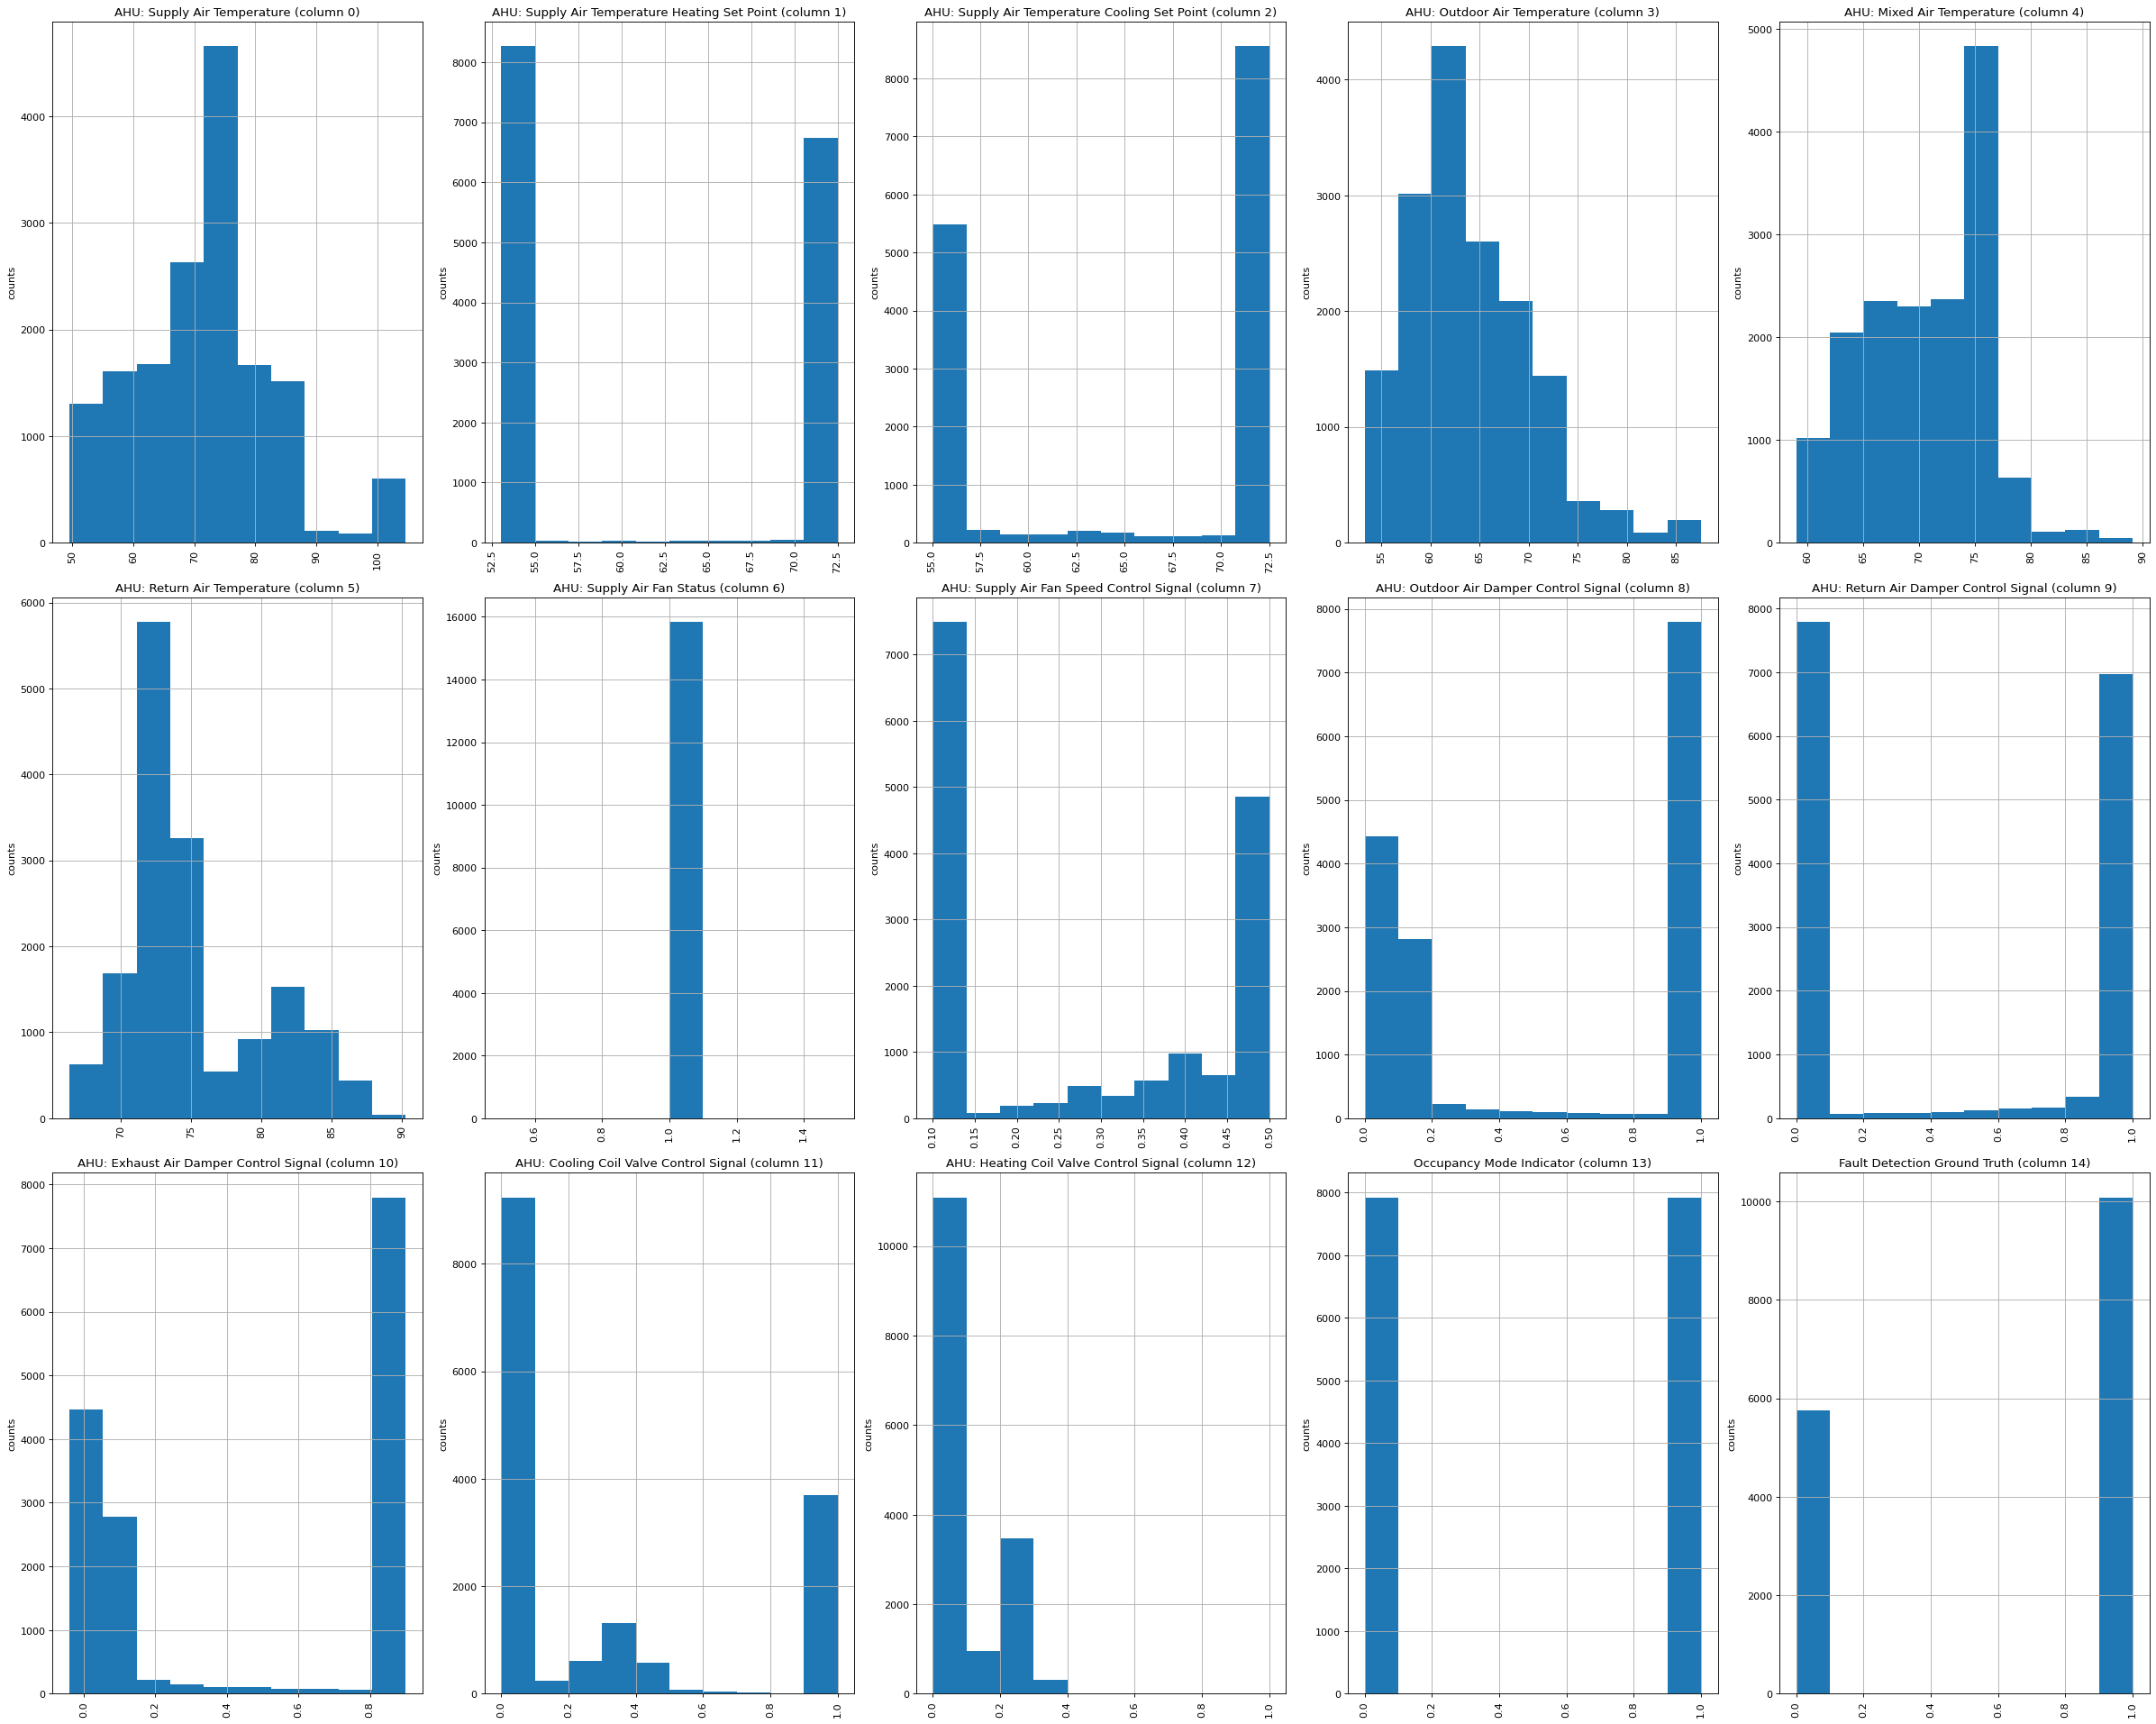

In [12]:
plotPerColumnDistribution(dataset.drop(['Datetime'],axis=1), 15, 5)

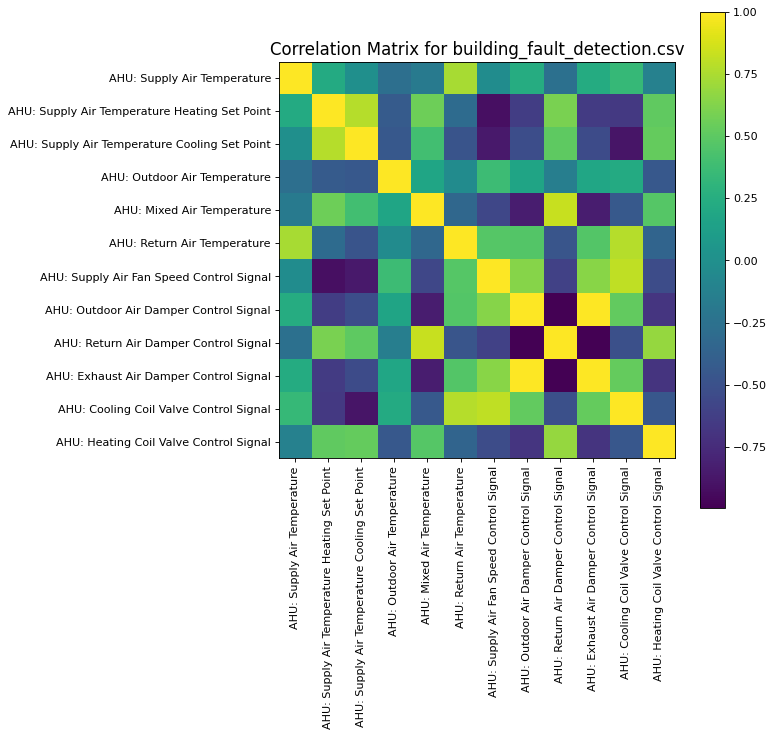

In [13]:
corr = plotCorrelationMatrix(dataset.drop(['Datetime',"AHU: Supply Air Fan Status",'Occupancy Mode Indicator','Fault Detection Ground Truth'], axis=1), 8)
# df.dat

# dataset.dropna(axis='index')

List highly co-related features

In [14]:
# find the features that have high correlation (corr > 0.8)
high_corr = corr[(corr) > 0.8]
# get features with high correlation
high_corr.stack().reset_index().query('level_0 != level_1')

,level_0,level_1,0
5,AHU: Mixed Air Temperature,AHU: Return Air Damper Control Signal,0.835711
8,AHU: Supply Air Fan Speed Control Signal,AHU: Cooling Coil Valve Control Signal,0.809578
10,AHU: Outdoor Air Damper Control Signal,AHU: Exhaust Air Damper Control Signal,0.999654
11,AHU: Return Air Damper Control Signal,AHU: Mixed Air Temperature,0.835711
13,AHU: Exhaust Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,0.999654
15,AHU: Cooling Coil Valve Control Signal,AHU: Supply Air Fan Speed Control Signal,0.809578


In [15]:
corr[(corr) < -0.8].stack().reset_index().query('level_0 != level_1')

,level_0,level_1,0
0,AHU: Supply Air Temperature Heating Set Point,AHU: Supply Air Fan Speed Control Signal,-0.913835
1,AHU: Supply Air Temperature Cooling Set Point,AHU: Supply Air Fan Speed Control Signal,-0.860539
2,AHU: Supply Air Temperature Cooling Set Point,AHU: Cooling Coil Valve Control Signal,-0.879137
3,AHU: Mixed Air Temperature,AHU: Outdoor Air Damper Control Signal,-0.838154
4,AHU: Mixed Air Temperature,AHU: Exhaust Air Damper Control Signal,-0.836183
5,AHU: Supply Air Fan Speed Control Signal,AHU: Supply Air Temperature Heating Set Point,-0.913835
6,AHU: Supply Air Fan Speed Control Signal,AHU: Supply Air Temperature Cooling Set Point,-0.860539
7,AHU: Outdoor Air Damper Control Signal,AHU: Mixed Air Temperature,-0.838154
8,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,-0.995965
9,AHU: Return Air Damper Control Signal,AHU: Outdoor Air Damper Control Signal,-0.995965


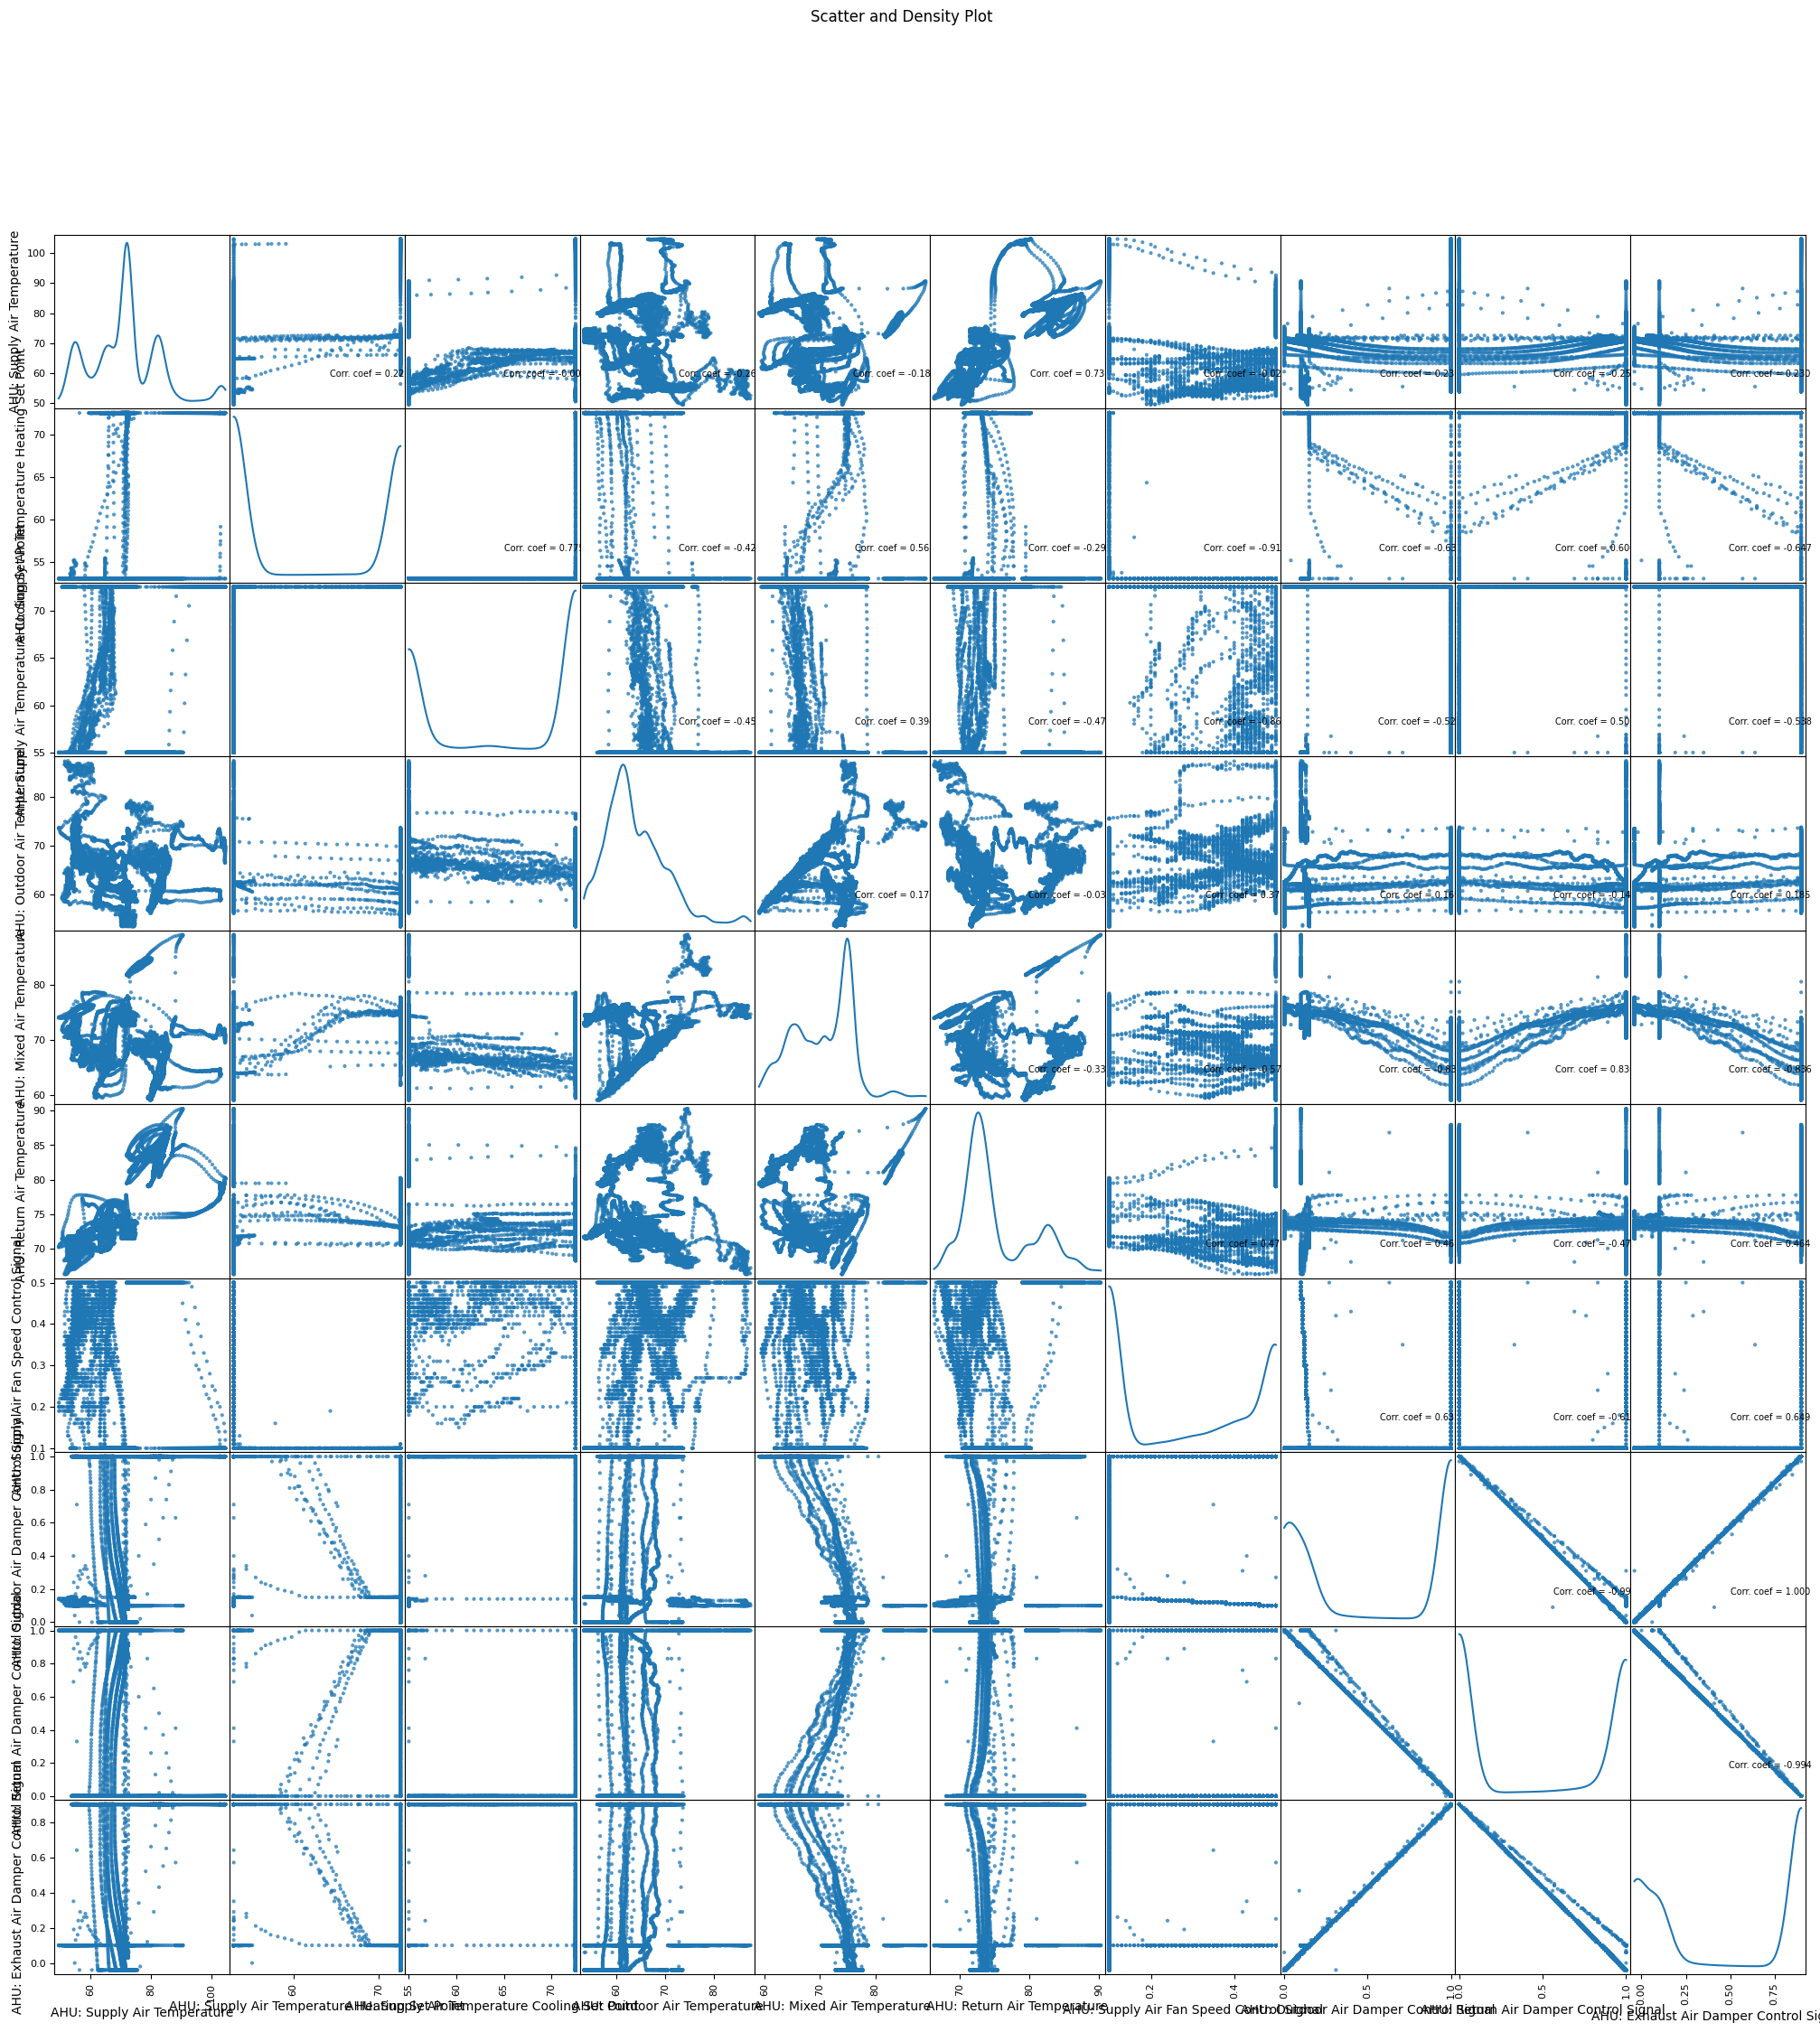

In [16]:
plotScatterMatrix(dataset.drop(['Datetime',"AHU: Supply Air Fan Status",'Occupancy Mode Indicator','Fault Detection Ground Truth'], axis=1), 25, 7)

In [27]:
dataset.columns

Index(['Datetime', 'AHU: Supply Air Temperature',
       'AHU: Supply Air Temperature Heating Set Point',
       'AHU: Supply Air Temperature Cooling Set Point',
       'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature',
       'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status',
       'AHU: Supply Air Fan Speed Control Signal',
       'AHU: Outdoor Air Damper Control Signal',
       'AHU: Return Air Damper Control Signal',
       'AHU: Exhaust Air Damper Control Signal',
       'AHU: Cooling Coil Valve Control Signal',
       'AHU: Heating Coil Valve Control Signal', 'Occupancy Mode Indicator',
       'Fault Detection Ground Truth'],
      dtype='object')

## Analysis of faulted & Unfaulted data

In [30]:
# normalize the dataset
normalizer = preprocessing.MinMaxScaler()
dataset_normalized = dataset.copy()
dataset_normalized = dataset_normalized.drop(['Datetime','Fault Detection Ground Truth','Occupancy Mode Indicator','AHU: Supply Air Fan Status'], axis=1)
normalized_columns = dataset_normalized.columns
dataset_normalized = normalizer.fit_transform(dataset_normalized)
dataset_normalized = pd.DataFrame(dataset_normalized, columns=normalized_columns)
dataset_normalized.index = dataset['Datetime']

In [17]:
faulty_days=[11,12,14,15,18,19,22]
normal_days = [20,21,23,24]

In [35]:

# filter normalized dataset for a specific date
uf_date = normal_days[3]
# uf_df = dataset_normalized[dataset_normalized.index.apply(lambda x: x.day == uf_date)]
normal_df = dataset_normalized[dataset_normalized.index.to_series().apply(lambda x: x.day == normal_days[0])]

fault_df = dataset_normalized[dataset_normalized.index.to_series().apply(lambda x: x.day == faulty_days[0])]
# fa_df.index = fa_df['Datetime']


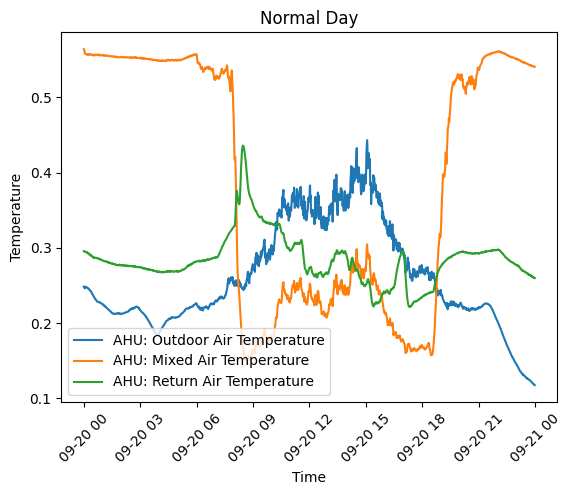

In [36]:
plot_df_columns(normal_df, ['AHU: Outdoor Air Temperature', #'AHU: Supply Air Temperature',
                        # 'AHU: Supply Air Temperature Cooling Set Point','AHU: Supply Air Temperature Heating Set Point', 
                        'AHU: Mixed Air Temperature', "AHU: Return Air Temperature"], 'Normal Day', 'Time', 'Temperature')

In [40]:
# dataset[dataset['Datetime'].apply(lambda x: x.day==faulty_days[0])].iloc[:,-1].sum()

1440

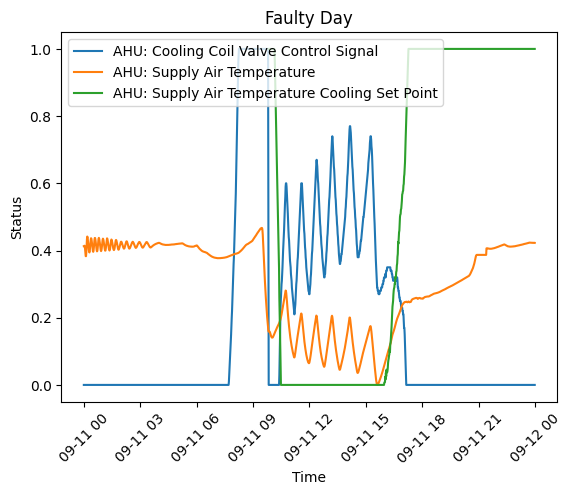

In [44]:
# plot_df_columns(uf_df, ['AHU: Outdoor Air Damper Control Signal', 'AHU: Return Air Damper Control Signal',], 'Normal Day', 'Time', 'Status')
# plot_df_columns(fault_df, ['AHU: Outdoor Air Damper Control Signal', 'AHU: Return Air Damper Control Signal',], 'Normal Day', 'Time', 'Status')
plot_df_columns(fault_df, ['AHU: Cooling Coil Valve Control Signal','AHU: Supply Air Temperature', 'AHU: Supply Air Temperature Cooling Set Point'], 'Faulty Day', 'Time', 'Status')


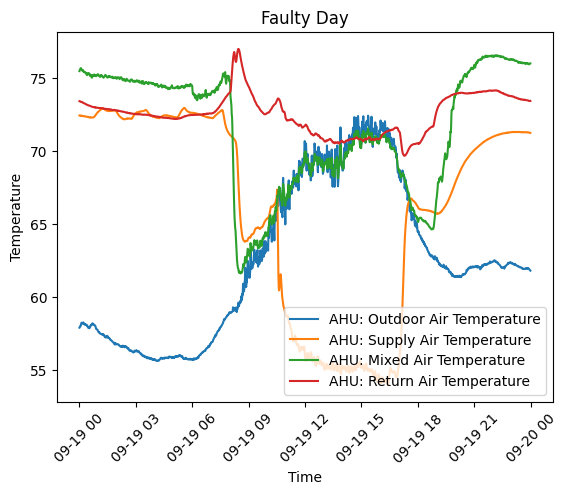

In [ ]:
plot_df_columns(fa_df, ['AHU: Outdoor Air Temperature', 'AHU: Supply Air Temperature',
                        # 'AHU: Supply Air Temperature Cooling Set Point','AHU: Supply Air Temperature Heating Set Point', 
                        'AHU: Mixed Air Temperature', "AHU: Return Air Temperature"], 'Faulty Day', 'Time', 'Temperature')

<Axes: title={'center': 'AHU: Supply Air Temperature'}, xlabel='Datetime', ylabel='Temperature'>

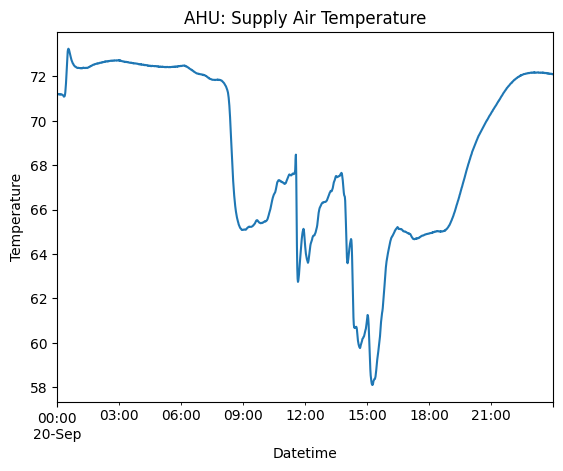

In [ ]:
uf_df['AHU: Supply Air Temperature'].plot(title='AHU: Supply Air Temperature', ylabel='Temperature')

<Axes: title={'center': 'AHU: Supply Air Temperature'}, xlabel='Datetime', ylabel='Temperature'>

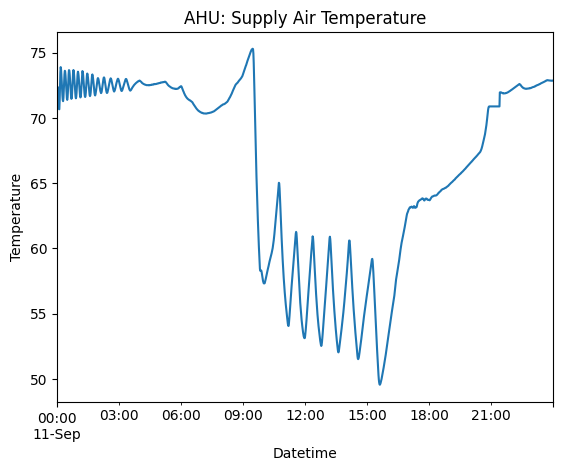

In [ ]:
fa_df['AHU: Supply Air Temperature'].plot(title='AHU: Supply Air Temperature', ylabel='Temperature')

<Axes: title={'center': 'AHU: Supply Air Temperature Cooling Set Point'}, xlabel='Datetime', ylabel='Temperature'>

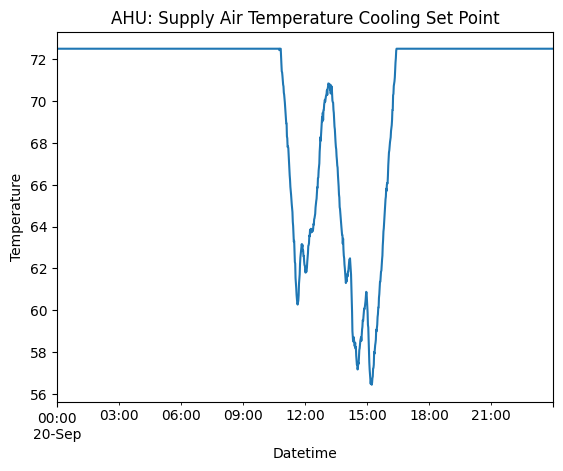

In [ ]:
uf_df['AHU: Supply Air Temperature Cooling Set Point'].plot(title='AHU: Supply Air Temperature Cooling Set Point', ylabel='Temperature')

<Axes: title={'center': 'AHU: Supply Air Temperature Heating Set Point'}, xlabel='Datetime', ylabel='Temperature'>

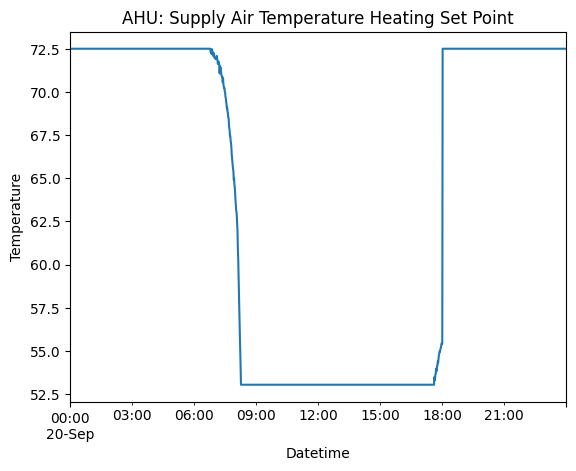

In [ ]:
uf_df['AHU: Supply Air Temperature Heating Set Point'].plot(title='AHU: Supply Air Temperature Heating Set Point', ylabel='Temperature')

# Use Case: Energy optimization

In [ ]:
# Convert the datetime column to a pandas datetime object for time-based feature extraction
ahu_data_cleaned['Datetime'] = pd.to_datetime(ahu_data_cleaned['Datetime'])

# Feature Engineering

# 1. Temperature Differentials
ahu_data_cleaned['Supply-Return Differential'] = ahu_data_cleaned['AHU: Supply Air Temperature'] - ahu_data_cleaned['AHU: Return Air Temperature']
ahu_data_cleaned['Outdoor-Supply Differential'] = ahu_data_cleaned['AHU: Outdoor Air Temperature'] - ahu_data_cleaned['AHU: Supply Air Temperature']

# 2. Time-Based Features
ahu_data_cleaned['Hour of Day'] = ahu_data_cleaned['Datetime'].dt.hour
ahu_data_cleaned['Day of Week'] = ahu_data_cleaned['Datetime'].dt.dayofweek

# 3. Occupancy-Adjusted Metrics
ahu_data_cleaned['Occupancy-Adjusted Fan Speed'] = ahu_data_cleaned['AHU: Supply Air Fan Speed Control Signal'] * ahu_data_cleaned['Occupancy Mode Indicator']

# Display the first few rows to review the new features
ahu_data_cleaned[['Datetime', 'Supply_Return_Temp_Diff', 'Supply_Outdoor_Temp_Diff', 
                  'Hour_of_Day', 'Day_of_Week', 'Occupied_Heating_Setpoint', 'Occupied_Cooling_Setpoint']].head()

Display the first few rows of the dataset with the new features
# ahu_data_cleaned.head()
